In [1]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

import mlgrad.func as func
import mlgrad.avragg as avragg
import mlgrad.mlocation_scatter2 as mlocation_scatter

from mlgrad import averager_it

import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

import pandas as pd

import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = True

/tmp/ipykernel_116143/3256078564.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])
/tmp/ipykernel_116143/3256078564.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])
/tmp/ipykernel_116143/3256078564.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remai

In [2]:
N = 500
CC = np.array([[0,0],[10,20],[40,10]], 'd')

In [3]:
phi_r1 = 2 * np.pi * np.random.rand(N)
R_r1 = (15 / (1 - 0.7*np.cos(phi_r1+np.pi/3))) * np.random.rand(N)
X1 = R_r1 * np.cos(phi_r1) + CC[0,0]
Y1 = R_r1 * np.sin(phi_r1) + CC[0,1]

In [4]:
phi_r2 = 2 * np.pi * np.random.rand(N)
R_r2 = (15 / (1 - 0.75*np.cos(phi_r2-np.pi/3))) * np.random.rand(N)
X2 = R_r2 * np.cos(phi_r2) + CC[1,0]
Y2 = R_r2 * np.sin(phi_r2) + CC[1,1]

In [5]:
phi_r3 = 2 * np.pi * np.random.rand(N)
R_r3 = (15 / (1 - 0.8*np.cos(phi_r3+np.pi/6))) * np.random.rand(N)
X3 = R_r3 * np.cos(phi_r3) + CC[2,0]
Y3 = R_r3 * np.sin(phi_r3) + CC[2,1]

In [6]:
X = np.hstack((X1,X2,X3))
Y = np.hstack((Y1,Y2,Y3))
XY = np.c_[X,Y]

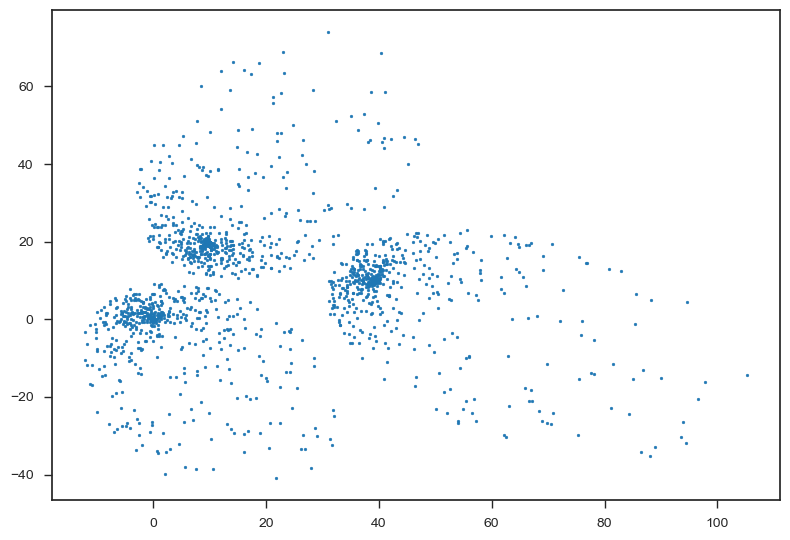

In [7]:
plt.scatter(X, Y, s=4)
plt.show()

In [8]:
# avgmin = avragg.SoftMinimal(0.05)
avgmin = avragg.Minimal()
avrfunc = averager_it(func.QuantileFunc(0.6, func.Sqrt(0.001)))
avrfunc = avragg.ParameterizedAverage(func.WinsorizedSmoothFunc(func.Sqrt(0.001)), avrfunc)
hcd = mlocation_scatter.MLocationsScattersEstimator(avrfunc, avgmin, 3, 
                                    tol=1.0e-8, n_step=500)

In [9]:
hcd.fit(XY) #, only='locations')

L: 156.8812246259274
S: 106.37382829539517
L: 68.2041648422856
S: 70.34342667602725
L: 69.22740175370109
S: 54.11837700833095
L: 57.601908063839716
S: 53.902105355051084
L: 64.18679464971805
S: 71.21062853778791
L: 79.03154862697343
S: 71.28170330545977
L: 64.13312102583934
S: 55.57677431269993
L: 66.65465376742138
S: 67.81570957318688
L: 69.31441509733703
S: 66.35168348563131
L: 77.76922076286965
S: 62.7584544840915
L: 63.78516571069286
S: 56.76297550220163
L: 59.451580704570624
S: 56.728366694421204
L: 63.55046739815849
S: 57.601221256475945
L: 66.22737976997794
S: 59.75680238715177
L: 72.38782443687658
S: 67.43233401629799
L: 71.60756302035341
S: 79.86033597522396
L: 89.87996340727007
S: 68.46604377828122
L: 72.0563483751558
S: 56.18583347412874
L: 56.4404728243566
S: 59.68741634328585
L: 65.54289329869512
S: 68.46454787932083
L: 61.32967801766137
S: 50.82751315448974
L: 51.90534057276428
S: 51.23801591965768
L: 50.977919838804354
S: 57.31916410146103
L: 52.1076757265587
S: 53.11818

/usr/lib/python3/dist-packages/matplotlib/ticker.py:2101: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


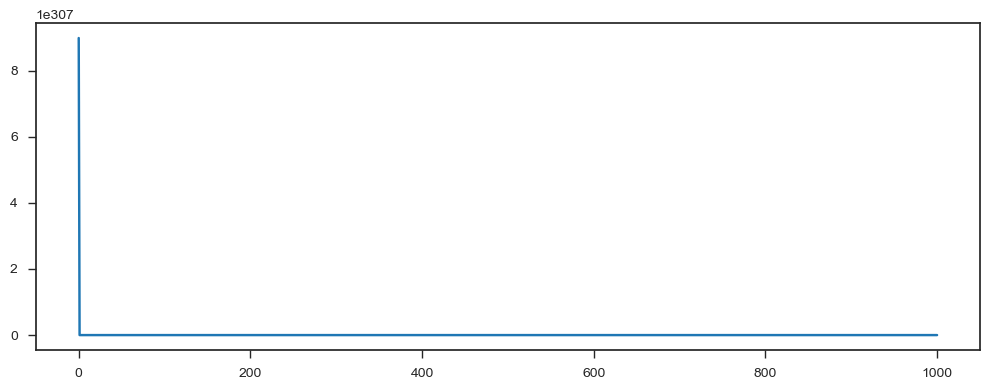

In [10]:
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
# plt.plot(hcd.dvals)
# plt.subplot(1,2,2)
plt.plot(hcd.dvals2)
plt.show()

0.27121720196391463 7542.513268979849


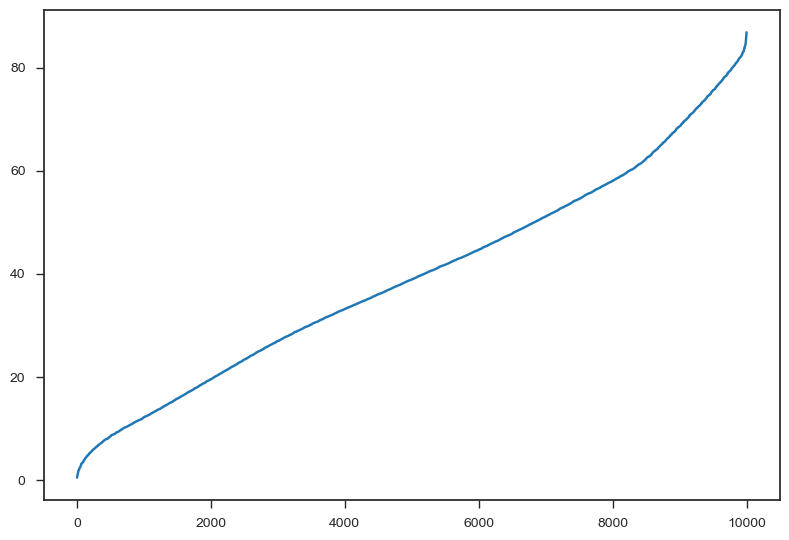

In [11]:
xrange1 = np.linspace(X.min(), X.max(), 100)
xrange2 = np.linspace(Y.min(), Y.max(), 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]

D = hcd.evaluate_dist(XX)
# C = hcd.evaluate(XX)
# CC = np.asarray(C).reshape(XX1.shape)
DD = D.reshape(XX1.shape)
print(D.min(), D.max())

plt.plot(sorted(np.sqrt(D)))

[[ 0.  0.]
 [10. 20.]
 [40. 10.]]
[[38.01892658 10.07284235]
 [ 0.40925088  1.59388909]
 [ 9.78824793 18.39868575]]


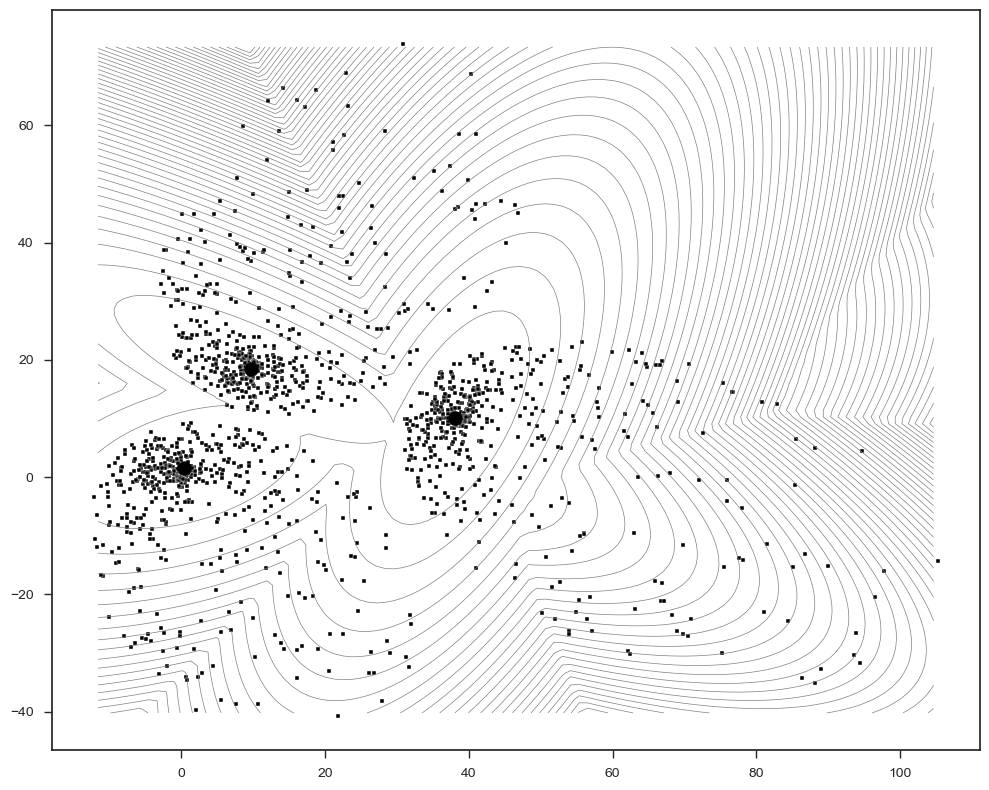

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(XY[:,0], XY[:,1], c='k', edgecolors='w', marker='s', s=9)
plt.contour(DD, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.0,D.max(),50), colors='grey', linewidths=0.5)
plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='k', edgecolors='k', s=100)
print(CC)
print(hcd.locs.base)
plt.show()

In [13]:
arith = avragg.ArithMean()
km = mlocation_scatter.MLocationsScattersEstimator(arith, avgmin, 3, 
                                    tol=1.0e-8, n_step=500)

In [14]:
km.fit(XY) #, only='locations')

L: 333.973670417313
S: 249.26088053442112
L: 235.25030759584268
S: 227.93607568577792
L: 226.04347177866882
S: 224.29452455482567
L: 223.99462391977846
S: 223.0177176030787
L: 222.86575906786788
S: 222.73761530713315
L: 222.72059032111963
S: 222.71295733409033
L: 222.7095924897436
S: 222.70812514830982
L: 222.70560594593647
S: 222.70560589121243


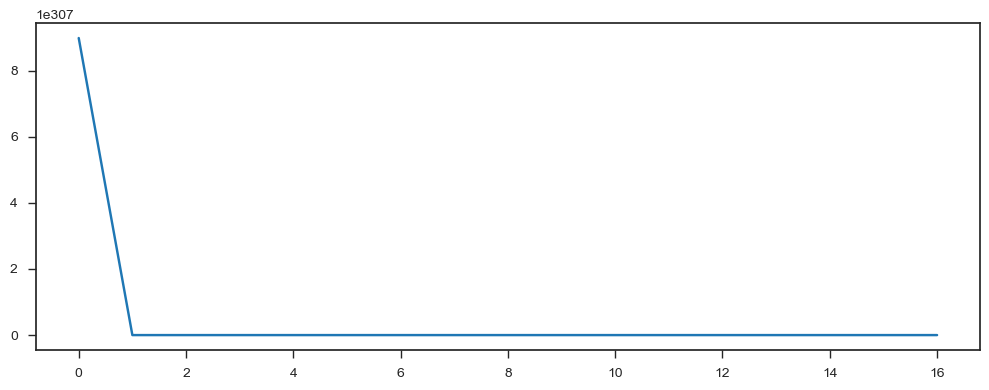

In [15]:
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
# plt.plot(km.dvals)
# plt.subplot(1,2,2)
plt.plot(km.dvals2)
plt.show()

0.11300756555000271 8762.308831246717


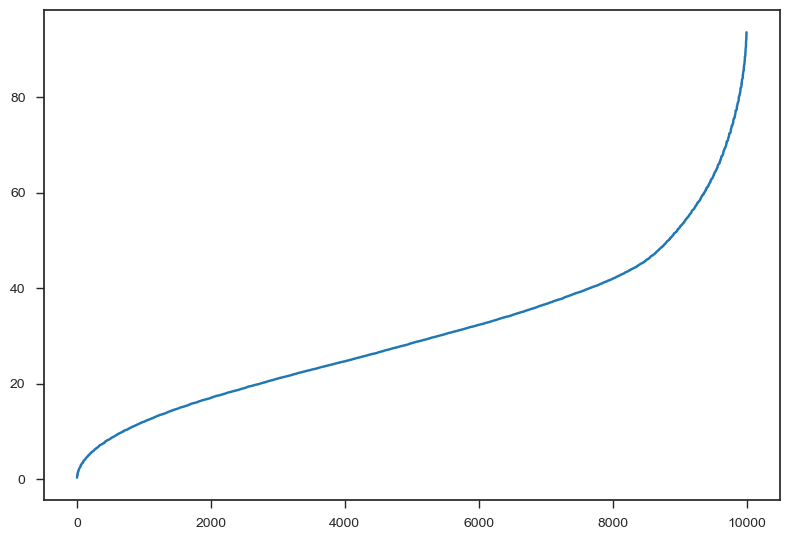

In [16]:
D2 = km.evaluate_dist(XX)
DD2 = D2.reshape(XX1.shape)
print(D2.min(), D2.max())
plt.plot(sorted(np.sqrt(D2)))

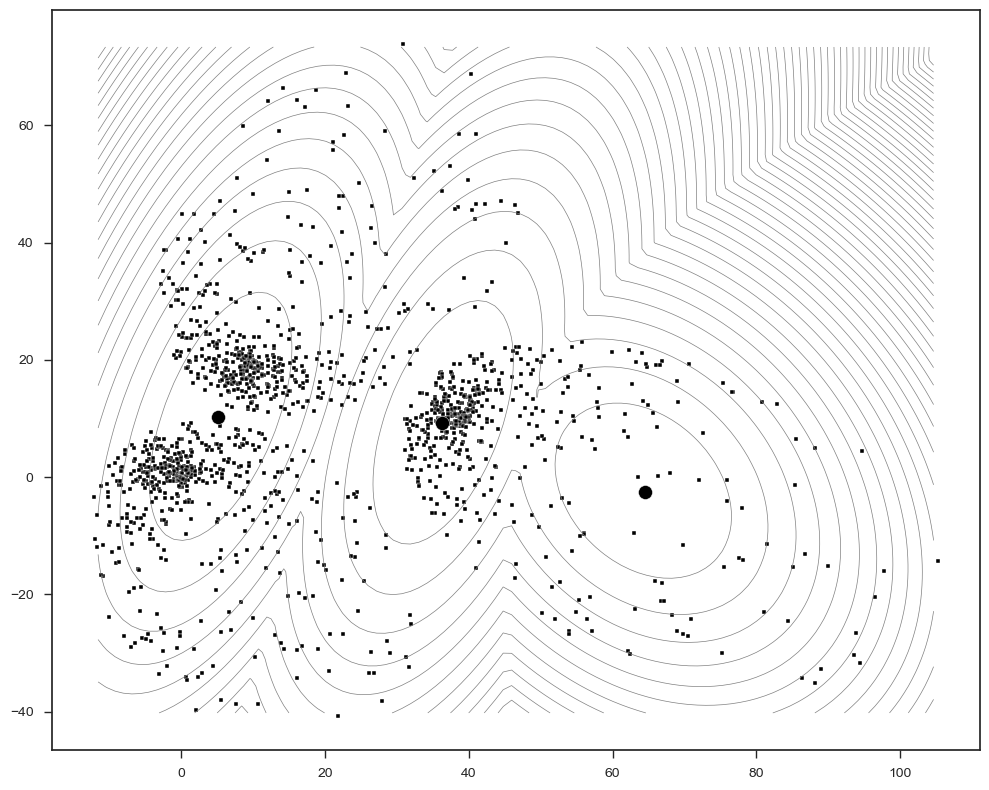

In [17]:
plt.figure(figsize=(10,8))
plt.contour(DD2, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.,D2.max(),50), colors='grey', linewidths=0.5)
plt.scatter(XY[:,0], XY[:,1], c='k', edgecolors='w', marker='s', s=9)
plt.scatter(km.locs[:,0], km.locs[:,1], c='k', edgecolors='w', s=100)
plt.show()

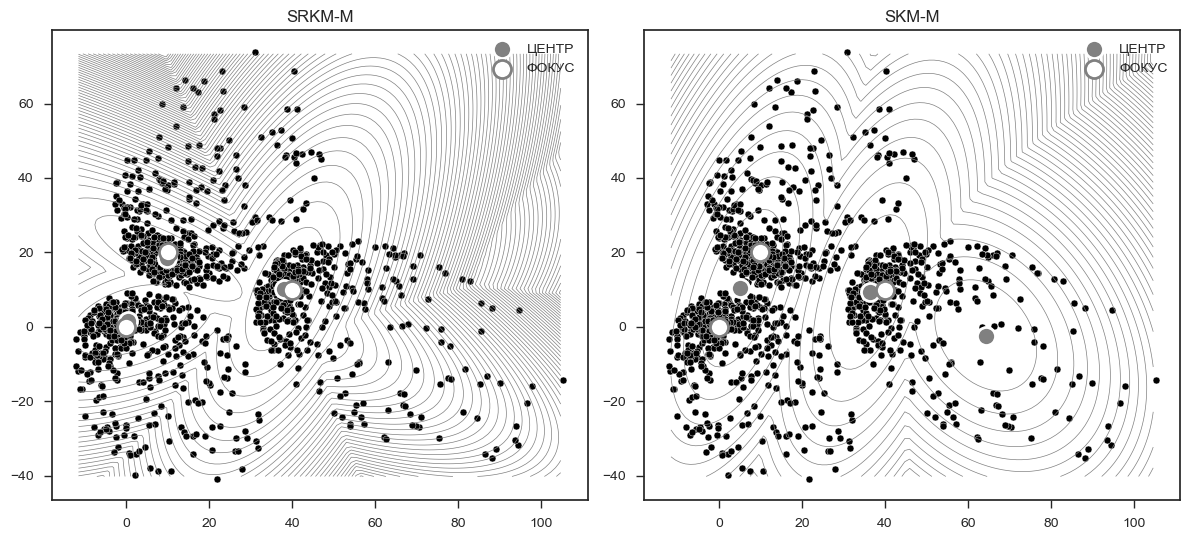

In [18]:
plt.figure(figsize=(12,5.5))

plt.subplot(1,2,1)
# plt.title('Robust algorithm')
plt.title('SRKM-M')
plt.contour(DD, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.,D.max(),60), colors='grey', linewidths=0.5)
plt.scatter(XY[:,0], XY[:,1], c='k', edgecolors='w', marker='o', s=25)
plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='grey', edgecolors='w', s=169, linewidths=2.0, label='ЦЕНТР')
plt.scatter(CC[:,0], CC[:,1], c='w', edgecolors='grey', s=169, linewidths=2.0, label='ФОКУС')
plt.legend()

plt.subplot(1,2,2)
plt.title('SKM-M')
plt.contour(DD2, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.,D2.max(),50), colors='grey', linewidths=0.5)
plt.scatter(XY[:,0], XY[:,1], c='k', edgecolors='w', marker='o', s=25)
plt.scatter(km.locs[:,0], km.locs[:,1], c='grey', edgecolors='w', s=169, linewidths=2.0, label='ЦЕНТР')
plt.scatter(CC[:,0], CC[:,1], c='w', edgecolors='grey', s=169, linewidths=2.0, label='ФОКУС')
plt.legend()
plt.savefig('fig/robust_kmeans_center_variance_SZ1.eps')
#plt.tight_layout()
plt.show()

In [19]:
#plt.scatter(D,D2,s=4)